Dataset: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data

Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
%matplotlib inline

Importing File & creating features + target

In [ ]:
heart_df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

heart_df.info()
heart_df.head()

target_column = ['DEATH_EVENT']
features = list(set(list(heart_df.columns))-set(target_column))
X = heart_df[features]  # Features
y = heart_df[target_column]   # Target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Data Processing

Split the dataset into a training, validation and test set.

In [ ]:
X = heart_df.drop(['DEATH_EVENT', 'time'], axis=1)
y = heart_df['DEATH_EVENT']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

#Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
print (X_train.shape, X_test.shape)

#Val split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=42)

# Convert pandas DataFrames/Series to NumPy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

(239, 11) (60, 11)


In [ ]:
print (X_train.shape, X_test.shape, X_val.shape)

(191, 11) (60, 11) (48, 11)


Logistic Regression

-----------------
0.0001
val_acc 0.7291666666666666
train_acc 0.743455497382199
test_acc 0.7
-----------------
-----------------
0.001
val_acc 0.7291666666666666
train_acc 0.743455497382199
test_acc 0.7
-----------------
-----------------
0.01
val_acc 0.75
train_acc 0.7539267015706806
test_acc 0.7166666666666667
-----------------
-----------------
0.1
val_acc 0.7708333333333334
train_acc 0.7591623036649214
test_acc 0.7166666666666667
-----------------
-----------------
1
val_acc 0.75
train_acc 0.7801047120418848
test_acc 0.7
-----------------
-----------------
10
val_acc 0.75
train_acc 0.7801047120418848
test_acc 0.7
-----------------
-----------------
25
val_acc 0.75
train_acc 0.7801047120418848
test_acc 0.7
-----------------
-----------------
50
val_acc 0.75
train_acc 0.7801047120418848
test_acc 0.7
-----------------
-----------------
75
val_acc 0.75
train_acc 0.7801047120418848
test_acc 0.7
-----------------
-----------------
100
val_acc 0.75
train_acc 0.7801047120418848
test_acc 0.

<ipython-input-4-63e3270642db>:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])  # Assuming labels are defined
<ipython-input-4-63e3270642db>:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


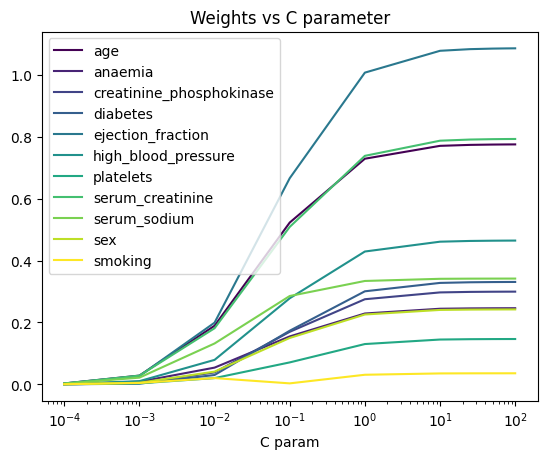

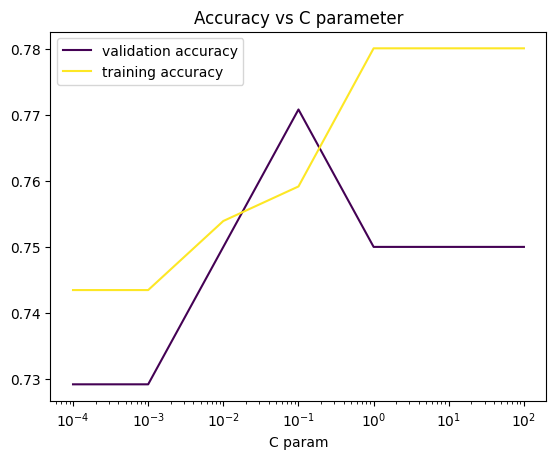

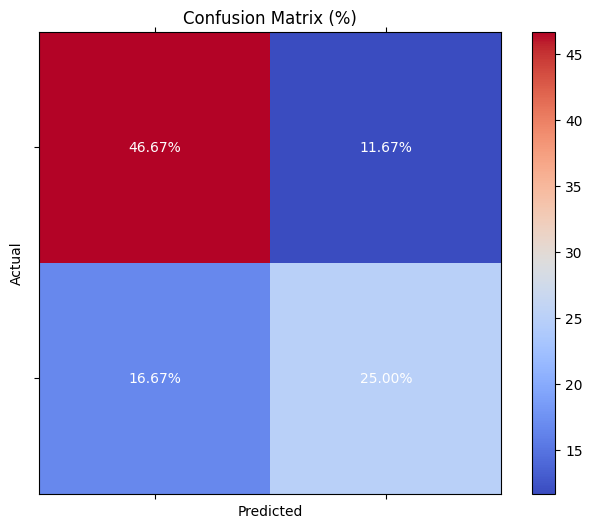


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.68      0.60      0.64        25

    accuracy                           0.72        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.71      0.72      0.71        60



In [ ]:
#Logistic Regression Parameters
r_param = [0.0001,0.001,0.01, 0.1, 1, 10, 25, 50, 75, 100]
# r_param= [1]

#Logistic Regression model
def logreg_model (X_train, X_val, X_test, y_train, y_val, y_test):

  weights  = {'C param' : r_param, 'age' : [], 'anaemia' : [],'creatinine_phosphokinase' : [],
              'diabetes' : [],'ejection_fraction' : [],'high_blood_pressure' : [],'platelets' : [],
              'serum_creatinine' : [], 'serum_sodium' : [], 'sex' : [], 'smoking' : []}
  accuracy = 0
  best_r = 0
  accuracy_dict = {'C param' : r_param, 'validation accuracy' : [], 'training accuracy' : []}

  for r in r_param:

    #No penalty
    # logreg = LogisticRegression(random_state = 42, C = r, class_weight = 'balanced' , penalty = 'none')

    #L2 regularization is default for Logistic Regression
    logreg = LogisticRegression(random_state = 42, C = r, class_weight = 'balanced')

    #L1 regularization
    # logreg = LogisticRegression(random_state = 42, C = r, class_weight = 'balanced', solver = 'liblinear', penalty = 'l1')

    #fit model with data (used on training data)
    logreg.fit(X_train, y_train)

    #implement weights into dictionary
    coef_abs = np.abs(logreg.coef_[0])
    feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                         'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
    for feature, coef in zip(feature_names, coef_abs):
        weights[feature].append(coef)

    #Using model to predict on training and validation sets
    train_predict = logreg.predict(X_train)
    val_predict = logreg.predict(X_val)

    #Accuracy
    train_accuracy = accuracy_score(y_train, train_predict)
    val_accuracy = accuracy_score(y_val, val_predict)

    accuracy_dict['validation accuracy'].append(val_accuracy)
    accuracy_dict['training accuracy'].append(train_accuracy)

    # print out accuracy for all regularization params for table reference
    # print ('-----------------')
    # print(r)
    # print ('val_acc',val_accuracy)
    # print ('train_acc',train_accuracy)
    # test_predict = logreg.predict(X_test)
    # test_acc = accuracy_score(y_test, test_predict)
    # print ('test_acc', test_acc)
    # print ('-----------------')

    if accuracy < val_accuracy:
      accuracy = val_accuracy
      best_r = r

  print ("Best parameters and accuracy ")
  print(best_r)
  print(accuracy)
  weight_data = pd.DataFrame(weights)
  weight_data.plot(x='C param', title = 'Weights vs C parameter', colormap = 'viridis',logx=True)

  accuracy_data = pd.DataFrame(accuracy_dict)
  accuracy_data.plot(x='C param', title = 'Accuracy vs C parameter', colormap = 'viridis',logx=True)

  # Evaluate the best model on the test set
  best_logreg = LogisticRegression(random_state=42, C=best_r, class_weight='balanced')
  best_logreg.fit(X_train, y_train)
  test_predict = best_logreg.predict(X_test)

  test_accuracy = accuracy_score(y_test, test_predict)
  print(test_accuracy)

  # Generate confusion matrix and classification report
  cm = confusion_matrix(y_test, test_predict)
  cr = classification_report(y_test, test_predict)

  cm_percentage = cm / np.sum(cm) * 100  # Convert to percentage

  fig, ax = plt.subplots(figsize=(8, 6))
  cax = ax.matshow(cm_percentage, cmap='coolwarm')  # Choose a colormap that fits the visual
  plt.title('Confusion Matrix (%)')
  fig.colorbar(cax)
  ax.set_xticklabels([''])  # Assuming labels are defined
  ax.set_yticklabels([''])

# Annotate each cell with the numeric value using a loop
  for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='white')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  print("\nClassification Report:")
  print(cr)

logreg_model(X_train, X_val, X_test, y_train, y_val, y_test)

#Polynomial transformation
# change_poly = PolynomialFeatures(degree = 4)
# X_train_4, X_val_4, X_test_4 = change_poly.fit_transform(X_train),change_poly.fit_transform(X_val),change_poly.fit_transform(X_test)
# logreg_model(X_train_4, X_val_4, X_test_4, y_train, y_val, y_test)

Support Vector Machine(SVM)

In [ ]:
# Create the parameter grid as before
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

model = SVC()
best_score = 0
best_recall = 0
best_prec = 0
best_params = None
best_model = None

In [ ]:
results_list = []

for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            model.set_params(C=C, gamma=gamma, kernel=kernel)

            model.fit(X_train, y_train)

            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)

            val_accuracy = accuracy_score(y_val, y_val_pred)
            val_precision = precision_score(y_val, y_val_pred, average='binary', zero_division=0)
            val_recall = recall_score(y_val, y_val_pred, average='binary', zero_division=0)

            train_accuracy = accuracy_score(y_train, y_train_pred)

            results_list.append({
                'C': C,
                'Gamma': gamma,
                'Kernel': kernel,
                'Training Accuracy': train_accuracy,
                'Validation Accuracy': val_accuracy,
                'Precision': val_precision,
                'Recall': val_recall
            })

            if val_accuracy > best_score:
                best_score = val_accuracy
                best_prec = val_precision
                best_recall = val_recall
                best_params = {'C': C, 'gamma': gamma, 'kernel': kernel}
                best_model = model

In [ ]:
results_df = pd.DataFrame(results_list)

results_df.sort_values(by='Validation Accuracy', ascending=False, inplace=True)
print(results_df)
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Best parameters:", best_params)
print("Test accuracy with best model:", test_accuracy)
print("Best Recall:", best_recall, best_prec)

            C  Gamma   Kernel  Training Accuracy  Validation Accuracy  \
0       0.001  scale      rbf           0.675393             0.812500   
52      0.100   auto      rbf           0.675393             0.812500   
60      0.100    0.1      rbf           0.675393             0.812500   
59      0.100   0.01  sigmoid           0.675393             0.812500   
58      0.100   0.01     poly           0.675393             0.812500   
..        ...    ...      ...                ...                  ...   
150  1000.000   auto     poly           1.000000             0.604167   
142   100.000     10     poly           1.000000             0.604167   
126   100.000   auto     poly           1.000000             0.604167   
122   100.000  scale     poly           1.000000             0.604167   
118    10.000     10     poly           1.000000             0.604167   

     Precision    Recall  
0     0.000000  0.000000  
52    0.000000  0.000000  
60    0.000000  0.000000  
59    0.000000 

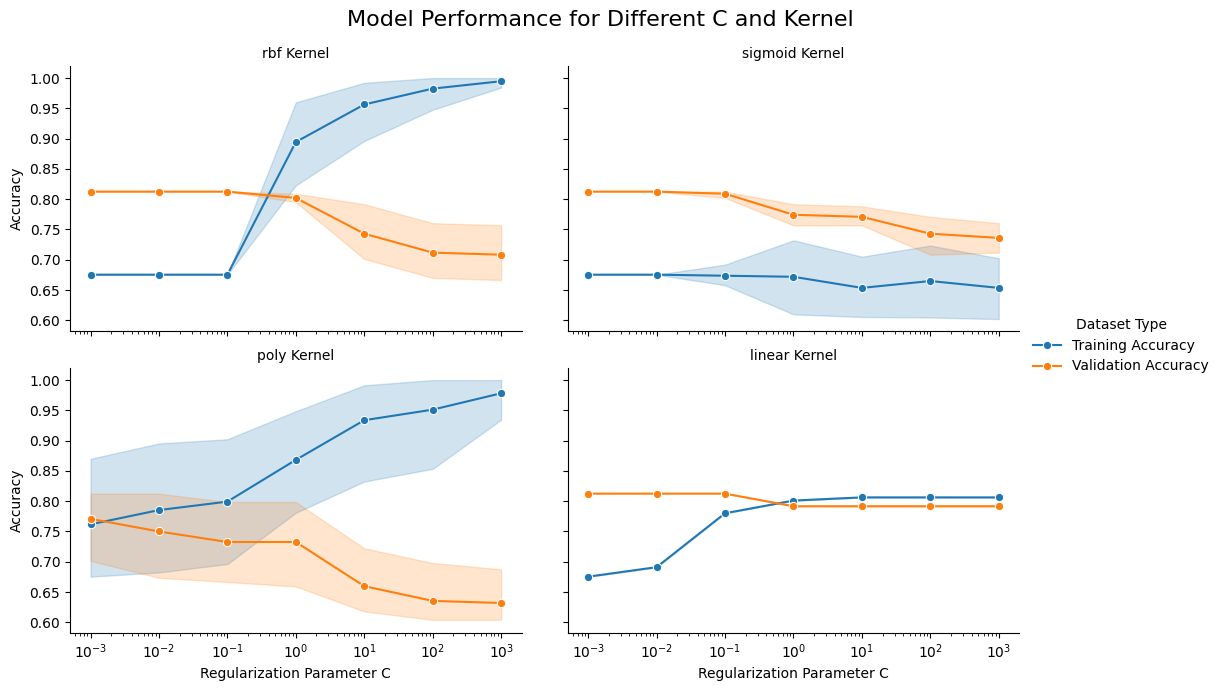

In [ ]:
melted_df = pd.melt(results_df, id_vars=['C', 'Kernel'], value_vars=['Training Accuracy', 'Validation Accuracy'], var_name='Type', value_name='Accuracy')

g = sns.FacetGrid(melted_df, col="Kernel", hue="Type", col_wrap=2, height=3.5, aspect=1.5)
g.map(sns.lineplot, 'C', 'Accuracy', marker="o")

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_xlabel('Regularization Parameter C')
    ax.set_ylabel('Accuracy')

g.set_titles(col_template="{col_name} Kernel")

g.fig.tight_layout(w_pad=3)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Model Performance for Different C and Kernel', fontsize=16)

g.add_legend(title='Dataset Type')

plt.show()

<ipython-input-10-3bc245f5114c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])
<ipython-input-10-3bc245f5114c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


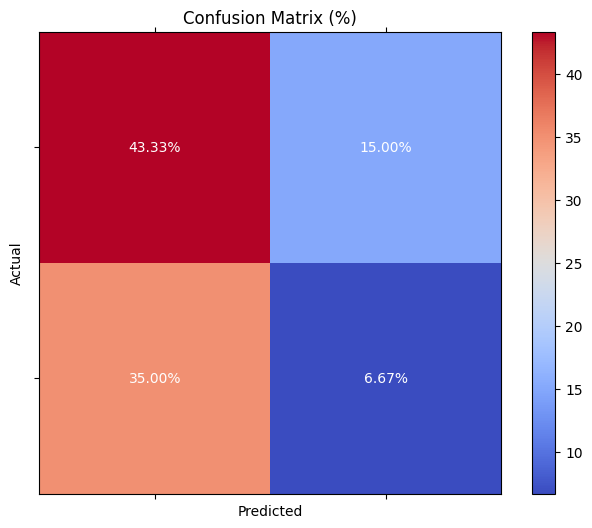

In [ ]:
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / np.sum(cm) * 100

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm_percentage, cmap='coolwarm')
plt.title('Confusion Matrix (%)')
fig.colorbar(cax)

ax.set_xticklabels([''])
ax.set_yticklabels([''])

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='white' if val < 50 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

results = grid_search.cv_results_

results_data = {
    'C': results['param_C'],
    'Gamma': results['param_gamma'],
    'Kernel': results['param_kernel'],
    'Mean Training Accuracy': results['mean_train_score'],
    'Mean Validation Accuracy': results['mean_test_score'],
    'Std Training Accuracy': results['std_train_score'],
    'Std Validation Accuracy': results['std_test_score']
}
results_df = pd.DataFrame(results_data)

results_df.sort_values(by='Mean Validation Accuracy', ascending=False, inplace=True)

results_df.to_csv('grid_search_results.csv', index=False)

y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

print("Best parameters:", best_params)
print("Test accuracy with best model:", test_accuracy)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


              precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy with best model: 0.7333333333333333


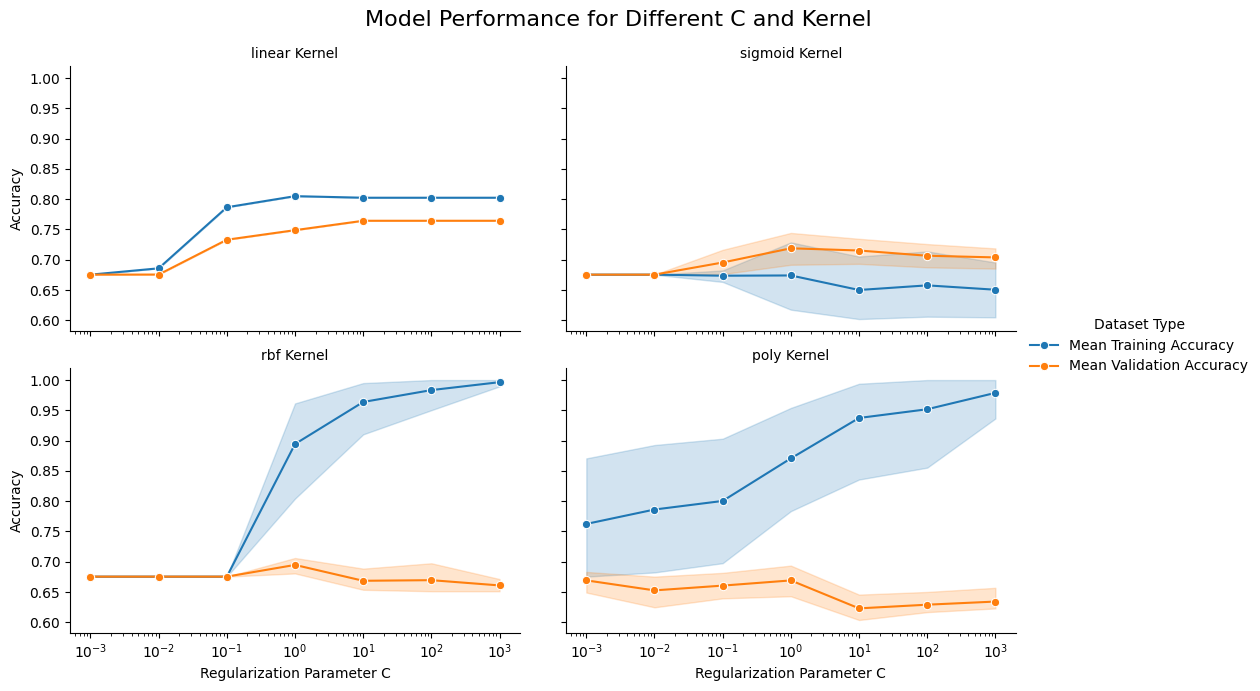

In [ ]:
melted_df = pd.melt(results_df, id_vars=['C', 'Kernel'],
                    value_vars=['Mean Training Accuracy', 'Mean Validation Accuracy'],
                    var_name='Type', value_name='Accuracy')

g = sns.FacetGrid(melted_df, col="Kernel", hue="Type", col_wrap=2, height=3.5, aspect=1.5)
g.map(sns.lineplot, 'C', 'Accuracy', marker="o")

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_xlabel('Regularization Parameter C')
    ax.set_ylabel('Accuracy')

g.set_titles(col_template="{col_name} Kernel")

g.fig.tight_layout(w_pad=3)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Model Performance for Different C and Kernel', fontsize=16)

g.add_legend(title='Dataset Type')

plt.show()

<ipython-input-13-e10afd8248fb>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])  # Assuming labels are defined
<ipython-input-13-e10afd8248fb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


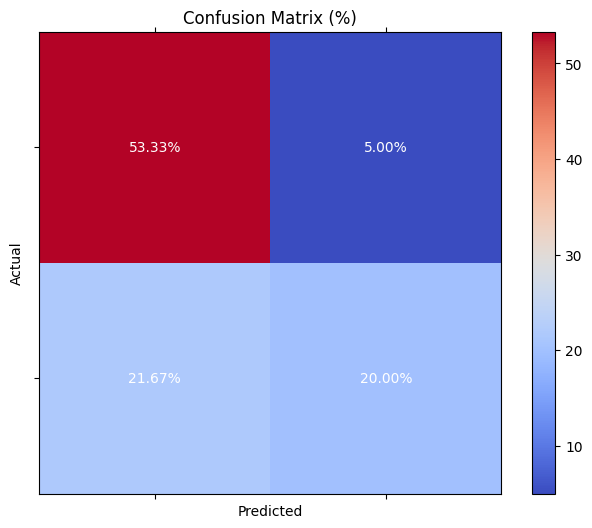

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / np.sum(cm) * 100

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm_percentage, cmap='coolwarm')
plt.title('Confusion Matrix (%)')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# pip install keras==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import precision_score, recall_score, make_scorer

def create_model(num_features=11, units_list=[16, 8], activations=['relu', 'relu'], dropout_rates=[0.25, 0.25], kernel_initializer='uniform'):
    model = Sequential()
    for i, units in enumerate(units_list):
        model.add(Dense(units=units, activation=activations[i],
                        kernel_regularizer=tf.keras.regularizers.l2(0.01),
                        input_dim=num_features if i == 0 else None))
        model.add(Dropout(rate=dropout_rates[i]))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)

param_grid = {
    'units_list': [
        [16],
        [16, 8],
        [16, 8, 8]
    ],
    'activations': [
        ['relu'],
        ['relu', 'relu'],
        ['relu', 'sigmoid'],
        ['sigmoid', 'relu'],
        ['tanh', 'relu'],
        ['relu', 'tanh'],
        ['sigmoid', 'sigmoid'],
        ['tanh', 'tanh'],
        ['relu', 'relu', 'relu'],
        ['relu', 'sigmoid', 'relu'],
        ['relu', 'relu', 'sigmoid'],
        ['sigmoid', 'sigmoid', 'sigmoid'],
        ['tanh', 'tanh', 'tanh']
    ],
    'dropout_rates': [
        [0.25],
        [0.25, 0.25],
        [0.25, 0.25, 0.25]
    ],
    'kernel_initializer': ['uniform'],
    'num_features': [11]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0)
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=3, return_train_score=True,refit='accuracy')
grid_result = grid.fit(X_train, y_train)

results_df = pd.DataFrame(grid_result.cv_results_)
print("Best Test Accuracy:", grid_result.best_score_)

<ipython-input-15-36ed01716af8>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)


4/4 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
147 fits failed out of a total of 351.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "

Best Test Accuracy: 0.7484292328042329


In [ ]:
desired_columns = [
    'param_units_list', 'param_activations', 'param_dropout_rates', 'param_kernel_initializer',
    'mean_train_accuracy', 'std_train_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
    'mean_train_precision', 'std_train_precision', 'mean_test_precision', 'std_test_precision',
    'mean_train_recall', 'std_train_recall', 'mean_test_recall', 'std_test_recall',
    'rank_test_accuracy'
]

results_df = results_df[desired_columns]

results_df = results_df.sort_values(by='rank_test_accuracy')

In [ ]:
print(results_df)

    param_units_list      param_activations param_dropout_rates  \
49           [16, 8]           [relu, tanh]        [0.25, 0.25]   
114             [16]     [tanh, tanh, tanh]  [0.25, 0.25, 0.25]   
13           [16, 8]           [relu, relu]        [0.25, 0.25]   
12              [16]           [relu, relu]        [0.25, 0.25]   
115          [16, 8]     [tanh, tanh, tanh]  [0.25, 0.25, 0.25]   
..               ...                    ...                 ...   
50        [16, 8, 8]           [relu, tanh]        [0.25, 0.25]   
46           [16, 8]           [relu, tanh]              [0.25]   
44        [16, 8, 8]           [tanh, relu]  [0.25, 0.25, 0.25]   
41        [16, 8, 8]           [tanh, relu]        [0.25, 0.25]   
83        [16, 8, 8]  [relu, sigmoid, relu]              [0.25]   

    param_kernel_initializer  mean_train_accuracy  std_train_accuracy  \
49                   uniform             0.845472            0.021125   
114                  uniform             0.811495

In [ ]:
results_df = results_df.rename(columns={
    'mean_test_accuracy': 'mean_validation_accuracy',
    'std_test_accuracy': 'std_validation_accuracy',
    'mean_test_precision': 'mean_validation_precision',
    'std_test_precision': 'std_validation_precision',
    'mean_test_recall': 'mean_validation_recall',
    'std_test_recall': 'std_validation_recall'
})
results_df.to_csv('detailed_grid_search_results.csv', index=False)

<ipython-input-20-b8e9875f729b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five['param_units_list'] = top_five['param_units_list'].apply(str)
<ipython-input-20-b8e9875f729b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five['param_activations'] = top_five['param_activations'].apply(str)
<ipython-input-20-b8e9875f729b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

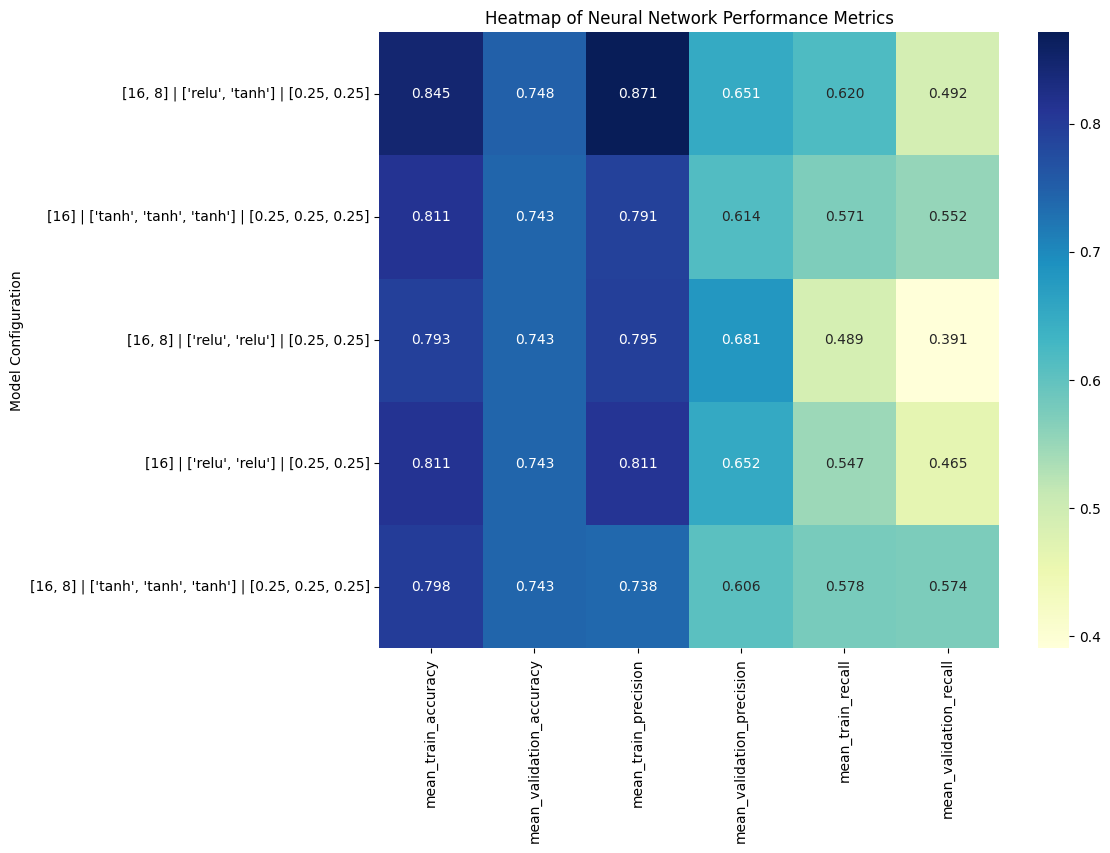

In [ ]:
top_five = results_df.head(5)

heatmap_data = top_five[['mean_train_accuracy', 'mean_validation_accuracy', 'mean_train_precision', 'mean_validation_precision', 'mean_train_recall', 'mean_validation_recall']]

top_five['param_units_list'] = top_five['param_units_list'].apply(str)
top_five['param_activations'] = top_five['param_activations'].apply(str)
top_five['param_dropout_rates'] = top_five['param_dropout_rates'].apply(str)

heatmap_data.index = top_five['param_units_list'] + " | " + top_five['param_activations'] + " | " + top_five['param_dropout_rates']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Neural Network Performance Metrics')
plt.ylabel('Model Configuration')
plt.show()